In [1]:
import pandas as pd
import numpy as np
from km_plusplus import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [3]:
file_path = "./EncodedCombined2.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Genre_rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
dataMat = data# Exclude first column (user IDs)
# data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(dataMat)

        UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0            1     1193       5       0          0          0           0   
1            1      661       3       0          0          1           1   
2            1      914       3       0          0          0           0   
3            1     3408       4       0          0          0           0   
4            1     2355       5       0          0          1           1   
...        ...      ...     ...     ...        ...        ...         ...   
869365    4211     3791       2       0          0          0           0   
869366    4211     3806       3       0          0          0           0   
869367    4211     3840       4       0          0          0           0   
869368    4211     3766       2       1          0          0           0   
869369    4211     3834       2       0          1          0           0   

        Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi 

In [4]:
dataMat["MovieID"]=dataMat["MovieID"].astype(np.int16)
dataMat["UserID"]=dataMat["UserID"].astype(np.int16)
for col in dataMat.columns:
    if(col!="MovieID" and col!="UserID"):
        dataMat[col]=dataMat[col].astype(np.int8)
print(dataMat.dtypes)

UserID         int16
MovieID        int16
Rating          int8
Action          int8
Adventure       int8
Animation       int8
Children's      int8
Comedy          int8
Crime           int8
Documentary     int8
Drama           int8
Fantasy         int8
Film-Noir       int8
Horror          int8
Musical         int8
Mystery         int8
Romance         int8
Sci-Fi          int8
Thriller        int8
War             int8
Western         int8
Gender          int8
Age             int8
Occupation      int8
dtype: object


In [5]:
df=dataMat
# Initialize an empty dictionary to store genre-wise ratings for each user
genre_ratings = {}

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    user_id = row['UserID']
    rating = row['Rating']
    genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    
    # Iterate over each genre and update the genre_ratings dictionary
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = {}
        if user_id not in genre_ratings[genre]:
            genre_ratings[genre][user_id] = {'total_rating': 0, 'count': 0}
        if row[genre] == 1:  # Check if the movie belongs to the genre
            genre_ratings[genre][user_id]['total_rating'] += rating
            genre_ratings[genre][user_id]['count'] += 1

# Initialize an empty dictionary to store the final DataFrame values
data = {}

# Iterate over each user and calculate the average rating for each genre
for user_id in set(df['UserID']):
    user_data = {}
    for genre, values in genre_ratings.items():
        if user_id in values and values[user_id]['count']>0:
            user_data[genre] = values[user_id]['total_rating'] / values[user_id]['count']
        else:
            user_data[genre] = np.nan
    data[user_id] = user_data

# Create the final DataFrame
result_df = pd.DataFrame.from_dict(data, orient='index')


In [6]:
data_matrix=result_df
data_matrix=data_matrix.sort_index()
data_matrix

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.000000,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.000000,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.500000,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.500000,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.634921,3.000000,3.250000,2.035714,2.246154,3.150000,NaN,3.116071,3.083333,3.000000,2.333333,1.500000,3.300000,3.047619,2.762500,1.972973,3.307692,2.333333
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.000000,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.250000,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6038,3.000000,4.000000,3.666667,3.000000,3.833333,NaN,NaN,3.888889,NaN,NaN,2.500000,NaN,NaN,4.166667,4.000000,NaN,4.000000,NaN


In [7]:
user_ids = set(df['UserID'])
user_ids=sorted(user_ids)
user_ids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,

In [8]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [9]:
avgdict = avg_rating.set_index('Genre')['Avg. Rating'].to_dict()
avg_dict = {key: float(value)  for key, value in avgdict.items() if value != 'Avg. Rating'}

# A = data_matrix.pivot(index='UserID', columns='Genre', values='Rating')
A_mat = data_matrix
A_watched=dataMat.pivot(index='UserID', columns='MovieID', values='Rating')
# print(avg_dict)
A_mat= A_mat.fillna(avg_dict)
A_np=A_mat.values
A_np

array([[4.2       , 4.        , 4.11111111, ..., 3.66666667, 5.        ,
        3.63777015],
       [3.5       , 3.73684211, 3.68486822, ..., 3.48387097, 3.73333333,
        4.33333333],
       [3.95652174, 4.        , 4.        , ..., 3.8       , 4.        ,
        4.66666667],
       ...,
       [3.64285714, 4.        , 4.        , ..., 3.70588235, 4.        ,
        3.75      ],
       [3.        , 4.        , 3.66666667, ..., 3.57046605, 4.        ,
        3.63777015],
       [2.97619048, 2.81818182, 3.        , ..., 3.92682927, 3.69565217,
        4.        ]])

In [10]:
A_mat=A_mat.round(2)
# print(A_mat.dtypes)
A_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.20,4.00,4.11,4.25,4.14,4.00,3.93,4.43,4.00,4.08,3.22,4.29,3.67,3.67,4.33,3.67,5.00,3.64
2,3.50,3.74,3.68,3.42,3.56,3.58,3.93,3.90,3.00,4.00,3.00,3.67,3.33,3.71,3.59,3.48,3.73,4.33
3,3.96,4.00,4.00,4.00,3.77,3.71,3.93,4.00,4.50,4.08,2.67,4.00,3.00,3.80,3.83,3.80,4.00,4.67
4,4.16,3.83,3.68,4.00,3.52,5.00,3.93,4.17,4.50,4.08,4.33,3.67,3.67,4.00,3.56,3.50,3.33,4.50
5,2.61,3.00,4.00,3.83,3.41,3.29,3.67,3.10,3.45,4.00,2.80,3.33,3.12,3.10,3.07,2.85,3.50,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.63,3.00,3.25,2.04,2.25,3.15,3.93,3.12,3.08,3.00,2.33,1.50,3.30,3.05,2.76,1.97,3.31,2.33
6036,3.00,2.99,3.91,3.44,3.20,3.53,3.91,3.51,3.00,4.06,2.99,3.71,3.41,3.35,2.83,3.14,3.79,3.64
6037,3.64,4.00,4.00,3.67,3.58,3.83,4.00,3.88,4.25,3.44,4.11,4.00,3.69,3.68,3.69,3.71,4.00,3.75
6038,3.00,4.00,3.67,3.00,3.83,3.71,3.93,3.89,3.45,4.08,2.50,3.67,3.67,4.17,4.00,3.57,4.00,3.64


In [11]:
A = Matrix(A_mat)
U,Sigma,V = A.svd()

non_zero_diag = get_non_zero_eigenvalues(Sigma)
print("This is nonzero diag")
print(non_zero_diag)
U_red,Sigma_red,V_red = A.randomized_svd(len(non_zero_diag))  # Number of components for SVD 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1322985.9626500017
3637.4442210826733
3154.5279487938833
2435.951277145095
2303.214900146496
1856.3716829823848
1799.5713954702237
1703.855717487332
1545.516718093489
1424.2188339904637
1208.4057228733823
1029.261806891477
976.5538196097771
760.7688457805381
669.6765745517274
525.0774476662863
386.34483373307336
358.30599010016215
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)
(5329,)

Outputs

[1.32298596e+06 3.63744422e+03 3.15452795e+03 2.43595128e+03
 2.30321490e+03 1.85637168e+03 1.79957140e+03 1.70385572e+03
 1.54551672e+03 1.42421883e+03 1.20840572e+03 1.02926181e+03
 9.76553820e+02 7.60768846e+02 6.69676575e+02 5.25077448e+02
 3.86344834e+02 3.58305990e+02]
[[ 0.01489812  0.01247048 -0.00641913 ...  0.          0.
   0.        ]
 [ 0.013

In [12]:
np.savetxt('U_redFinalComn.txt', U_red)
np.savetxt('Sigma_redFinalComn.txt', Sigma_red)
np.savetxt('V_redFinalComn.txt', V_red)

In [16]:
U_red = np.loadtxt('U_redFinalComn.txt')
Sigma_red = np.loadtxt('Sigma_redFinalComn.txt')
V_red = np.loadtxt('V_redFinalComn.txt')
print(U_red.shape)
print(Sigma_red.shape)
print(V_red.shape)
# Reshape Sigma_red to a diagonal matrix
# Sigma_red = np.diag(Sigma_red)

(5329, 18)
(18, 18)
(18, 18)


In [17]:
def elbow_method(data, max_clusters=4 , skip_factor=1):
    distortions = []
    for i in range(1, int((max_clusters + 1)/skip_factor)):
        km = KMeans(i*skip_factor)
        km.fit(data)
        distortions.append(km.get_cost())
    # Plotting the elbow curve
    plt.plot(range(1, int((max_clusters + 1)/skip_factor)), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Assuming your data is in V_red_T
# Perform Elbow Method
new_mat = U_red
new_mat

array([[ 0.01489812,  0.01247048, -0.00641913, ...,  0.01468442,
         0.00739715, -0.007662  ],
       [ 0.01336807,  0.00012742,  0.00266836, ...,  0.00146392,
        -0.00877769, -0.00882668],
       [ 0.01429362,  0.01526223, -0.00842611, ...,  0.00142643,
         0.00176494, -0.00270945],
       ...,
       [ 0.01410145,  0.00726977, -0.01280221, ..., -0.00347995,
        -0.00903895, -0.00242739],
       [ 0.01351398, -0.00108815,  0.00319666, ...,  0.00511796,
        -0.03691237,  0.00729568],
       [ 0.01344493, -0.00289906,  0.01694269, ..., -0.01409464,
        -0.01302258,  0.00137457]])

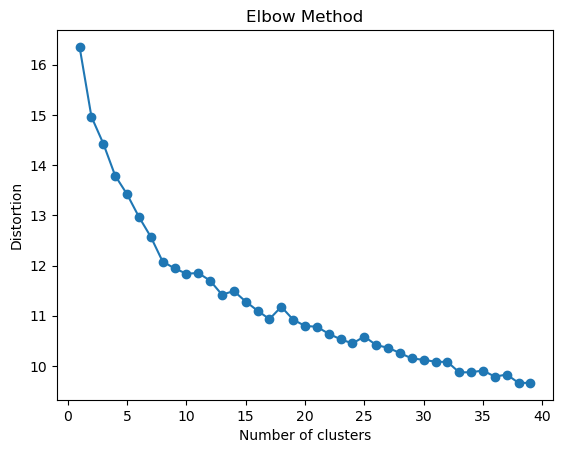

In [23]:
# elbow_method(new_mat,120,3)

In [24]:
km = KMeans(75)
km.fit(new_mat)

In [75]:
# Recommend movies for a particular user
def recommend_movies(user_id, data, users_watched,user_idx,cluster_labels):
    user_cluster = cluster_labels[user_idx[user_id]]
    # print(user_cluster)
    cluser_users = []
    for row,cluster in cluster_labels.items():
        if cluster == user_cluster and row!=user_idx[user_id]:
            cluser_users.append(users_watched.iloc[row]) 

    rating_movie = {}
    movie_rating_count={}
    for df in cluser_users:
        for key,value in df[df.notnull()].items():
            if int(key) not in rating_movie:
                rating_movie[int(key)] = 0
                movie_rating_count[int(key)] = 0
            
            rating_movie[int(key)]+=float(value)
            movie_rating_count[int(key)]+=1

    for key,value in movie_rating_count.items():
        if(value>0):
            rating_movie[key]=rating_movie[key]/float(value)

    final_list = sorted(rating_movie.items(), key=lambda x: x[1],reverse=True)

    movies=pd.read_csv("movies.csv")
    movies=movies.set_index(keys=['MovieID'])
    recommendations=[]
    for x in final_list:
        movie=movies.loc[x[0]]
        recommendations.append([x[0],x[1],movie['Title'],movie['Genres']])

    return recommendations

In [82]:
cluster_labels = km.get_pointCluster()

user_index = {}
i =0
for x in user_ids:
    user_index[int(x)] = i 
    i+=1

print(f"Cluster Labels: {cluster_labels}")
print(f"User_Index : {user_index}")
# User ID for which we want to recommend movies
user_id = 250  # Replace with the desired user ID

# Recommend movies for the user
recommended_movies = recommend_movies(user_id, new_mat,A_watched,user_index,cluster_labels)
print("Recommended movies for User", user_id)
for movie in recommended_movies[:5]:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles


Cluster Labels: {0: 71, 1: 45, 2: 54, 3: 38, 4: 54, 5: 57, 6: 63, 7: 63, 8: 41, 9: 40, 10: 47, 11: 18, 12: 33, 13: 40, 14: 70, 15: 61, 16: 15, 17: 44, 18: 3, 19: 64, 20: 67, 21: 62, 22: 64, 23: 53, 24: 32, 25: 40, 26: 56, 27: 70, 28: 23, 29: 45, 30: 23, 31: 60, 32: 54, 33: 69, 34: 49, 35: 71, 36: 68, 37: 54, 38: 70, 39: 1, 40: 65, 41: 64, 42: 64, 43: 54, 44: 67, 45: 50, 46: 47, 47: 57, 48: 51, 49: 18, 50: 61, 51: 16, 52: 26, 53: 29, 54: 23, 55: 61, 56: 63, 57: 23, 58: 65, 59: 44, 60: 31, 61: 15, 62: 17, 63: 23, 64: 64, 65: 72, 66: 45, 67: 43, 68: 11, 69: 67, 70: 44, 71: 56, 72: 31, 73: 36, 74: 32, 75: 45, 76: 56, 77: 41, 78: 8, 79: 45, 80: 65, 81: 21, 82: 23, 83: 25, 84: 56, 85: 71, 86: 62, 87: 38, 88: 33, 89: 25, 90: 50, 91: 50, 92: 53, 93: 32, 94: 57, 95: 33, 96: 16, 97: 38, 98: 54, 99: 69, 100: 51, 101: 16, 102: 33, 103: 27, 104: 73, 105: 16, 106: 45, 107: 17, 108: 54, 109: 71, 110: 25, 111: 64, 112: 51, 113: 38, 114: 70, 115: 71, 116: 71, 117: 72, 118: 25, 119: 64, 120: 54, 121: 31

In [81]:
df=A_watched.loc[user_id]
result_map = {}

for key,value in df[df.notnull()].items():
    result_map[key] = value

movies=pd.read_csv("movies.csv")
movies=movies.set_index(keys=['MovieID'])
result_map=dict(sorted(result_map.items(), key=lambda item: item[1],reverse=True))

movies_currently_watched=[]
for movieID,rating in result_map.items():
    movie=movies.loc[movieID]
    movies_currently_watched.append([movieID,rating,movie['Title'],movie['Genres']])

print("Movies Watched by User :", user_id)
for movie in movies_currently_watched:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles

Movies Watched by User : 250
Title : Escape from New York (1981) , MovieID : 1129 , Rating : 5.0 , Genres : Action|Adventure|Sci-Fi|Thriller
Title : Airplane! (1980) , MovieID : 2791 , Rating : 5.0 , Genres : Comedy
Title : From Russia with Love (1963) , MovieID : 2948 , Rating : 5.0 , Genres : Action
Title : Frequency (2000) , MovieID : 3510 , Rating : 5.0 , Genres : Drama|Thriller
Title : Forrest Gump (1994) , MovieID : 356 , Rating : 4.0 , Genres : Comedy|Romance|War
Title : Jurassic Park (1993) , MovieID : 480 , Rating : 4.0 , Genres : Action|Adventure|Sci-Fi
Title : Mission: Impossible (1996) , MovieID : 648 , Rating : 4.0 , Genres : Action|Adventure|Mystery
Title : Alien (1979) , MovieID : 1214 , Rating : 4.0 , Genres : Action|Horror|Sci-Fi|Thriller
Title : Nikita (La Femme Nikita) (1990) , MovieID : 1249 , Rating : 4.0 , Genres : Thriller
Title : Donnie Brasco (1997) , MovieID : 1466 , Rating : 4.0 , Genres : Crime|Drama
Title : Lost World: Jurassic Park, The (1997) , MovieID : 